# Домашняя работа №3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [40]:
# следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)


Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [5]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [42]:
freedom = df['Freedom']
positive_affect = df['Positive affect']


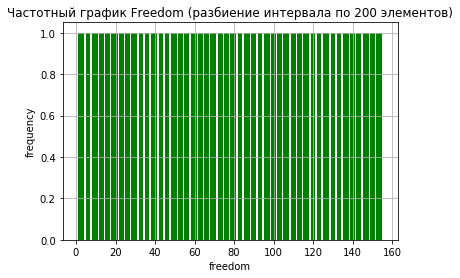

In [45]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Freedom'], 200, facecolor='g')

plt.xlabel('freedom')
plt.ylabel('frequency')
plt.title('Частотный график Freedom (разбиение интервала по 200 элементов)')
plt.grid(True)
plt.show()

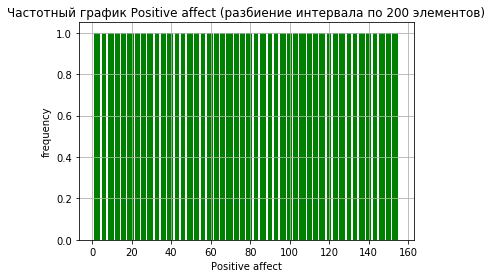

In [44]:
n, bins, patches = plt.hist(df['Positive affect'], 200, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.title('Частотный график Positive affect (разбиение интервала по 200 элементов)')
plt.grid(True)
plt.show()

Это равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [46]:
# Математичесоке ожидание (среднее значение случайной величины)
df1 = df.dropna()
statistics.mean(df1['Freedom'])

78.82857142857142

In [47]:
# Медиана
print('Медиана: ', statistics.median(df1['Freedom']))

Медиана:  79.5


In [48]:
print('Значение моды: ', statistics.mode(df['Freedom']))

StatisticsError: no unique mode; found 156 equally common values

Почему нельзя найти моду?

Мода - значение, которое наиболее часто встречается в выборке, а в данном случае все значения уникальны

In [49]:
# Минимум
min(freedom)

1.0

In [50]:
# Максимум
max(freedom)

155.0

In [51]:
# Стандартное отклонение
statistics.pstdev(df1['Freedom'])

44.9475794449399

In [52]:
# Дисперсия
statistics.pvariance(df1['Freedom'])

2020.2848979591836

In [53]:
# Выбросы
df['Freedom'].isnull().sum() # имеются ли отсутствующие значения

1

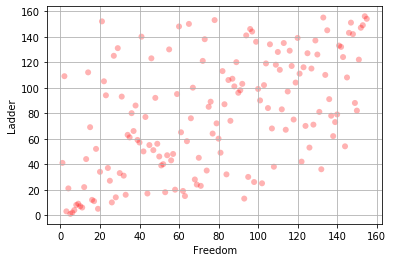

In [54]:
fig, ax = plt.subplots() # есть ли выбросы по значениям
ax.scatter(df['Freedom'], df['Ladder'], c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Ladder')
plt.show()

In [55]:
# Размах
freedom_range = max(freedom) - min(freedom)
print(freedom_range)

154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

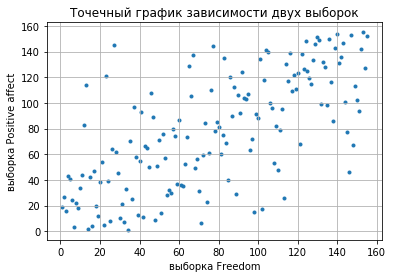

In [56]:
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [60]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df1['Freedom'], df1['Positive affect'])
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.696567045809068


О чем говорит знак коэффициента? 

Положительные значения - прямая взаимосвязь между показателями, а отрицательные значения - обратная взаимосвязь между ними. В нашем случае, чем больше значение Freedom, тем больше значение Positive affect

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [20]:
freedom1 = df1['Freedom']
freedom_center = freedom1 - statistics.mean(freedom1)
print(statistics.mean(freedom_center))

6.496390726949487e-15


In [21]:
min(freedom_center)

-77.82857142857142

In [22]:
max(freedom_center)

76.17142857142858

In [23]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_norm = min_max_scaler.fit_transform(np.array(freedom_center).reshape(-1, 1))
print(min(freedom_norm))
print(max(freedom_norm))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

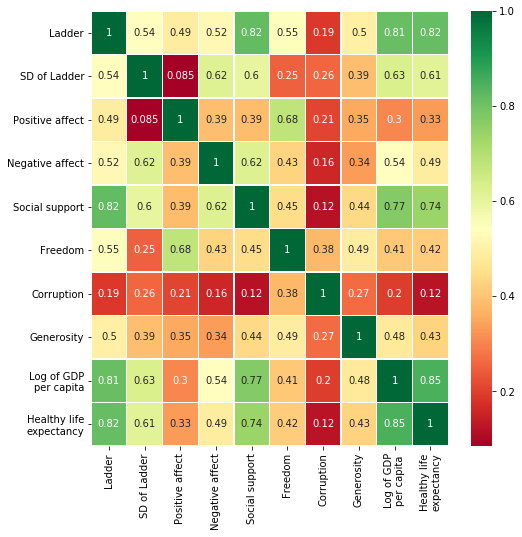

In [24]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(8,8)
plt.show()

Загрузить таблицу цен на авокадо: 

In [66]:
df=pd.read_csv('avocado.csv')
# df[:3]
df.head(50)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

In [69]:
len(df['AveragePrice'])

18249

In [81]:
df.AveragePrice.nunique()

259

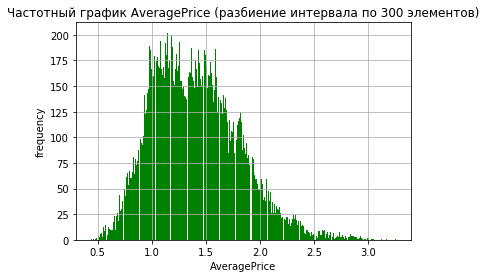

In [83]:
n, bins, patches = plt.hist(df['AveragePrice'], 300, facecolor='g')

plt.xlabel('AveragePrice')
plt.ylabel('frequency')
plt.title('Частотный график AveragePrice (разбиение интервала по 300 элементов)')
plt.grid(True)
plt.show()

Похоже на нормальное распределение с некоторыми отклонениями

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

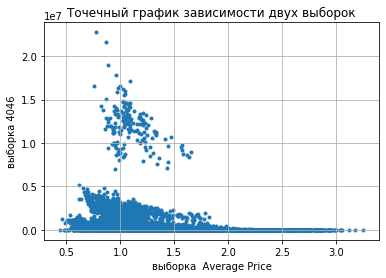

In [35]:
plt.xlabel('выборка  Average Price')
plt.ylabel('выборка 4046')

plt.title('Точечный график зависимости двух выборок')
plt.grid(True)
plt.scatter(df['AveragePrice'], df['4046'],  marker='.')

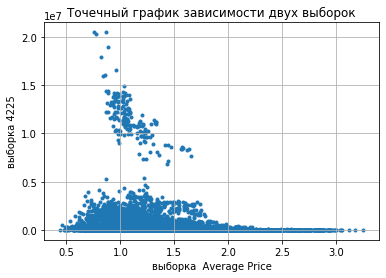

In [36]:
plt.xlabel('выборка  Average Price')
plt.ylabel('выборка 4225')

plt.title('Точечный график зависимости двух выборок')
plt.grid(True)
plt.scatter( df['AveragePrice'], df['4225'], marker='.')

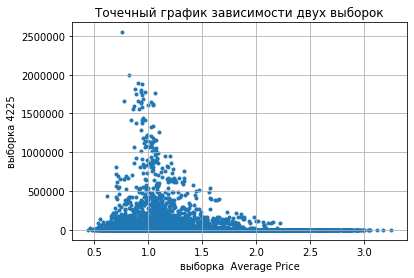

In [37]:
plt.xlabel('выборка  Average Price')
plt.ylabel('выборка 4225')

plt.title('Точечный график зависимости двух выборок')
plt.grid(True)
plt.scatter(df['AveragePrice'], df['4770'],  marker='.')

Есть зависимость количества купленного авокадо (всех трех видов) от цены. Зависимость нелинейная